In [3]:
from display import display_figures
from display.display_figures_by_county import display_connect_structure, display_spatCorrLevels, display_spatCorr_onR

from include.build_synth import buildData_fromRO as build
from include.build_synth import load_RO as load

from include.build_synth.Tikhonov_method import Tikhonov_spat_corr_config
from include.build_synth.compute_spatCorrLevels import compute_spatCorrLevels

## Univariate synthetic infection counts

### Load ground truth univariate reproduction number $\boldsymbol{\mathsf{R}}^\dagger$ and reporting errors $\boldsymbol{\mathsf{O}}^\dagger$
Here is the list of the configurations available in [data/Synthetic/Univariate](data/Synthetic/Univariate), giving ground truths for R and O for each.
* Configuration `'I'`&ensp;&ensp;&ensp;: faster dynamic changes and a lot of outliers
* Configuration `'II'`&ensp;&ensp;: slower dynamic changes and fewer outliers
* Configuration `'III'`&ensp;: faster dynamic changes and fewer outliers
* Configuration `'IV'`&ensp;&ensp;: slower dynamic changes and a lot of outliers

In [6]:
# Choice of configuration
configuration = 'III'

RDagger, ODagger = load.loadROconfig(configuration)

### Building synthetic data following Cori's extended model
Given `firstCases` initial number of cases for day 1, loaded $\mathsf{R}^\dagger$ and $\mathsf{O}^\dagger$, build synthetic data $\mathsf{Z}$ (`ZDataBuilt`) drawn following Cori's extended model [3]:

For each day $t$, $\mathsf{Z}_t$ is drawn according to a Poisson law of parameter $\mathsf{R}_{t}^\dagger \, \sum_{s=1}^t \phi_s\mathsf{Z}_{t-s} + \mathsf{O}^\dagger_t$ where $\phi$ is the serial interval function.

c:\Users\adminuser\Documents\GitHub\Covid-R-estim\display\display_figures.py:254: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


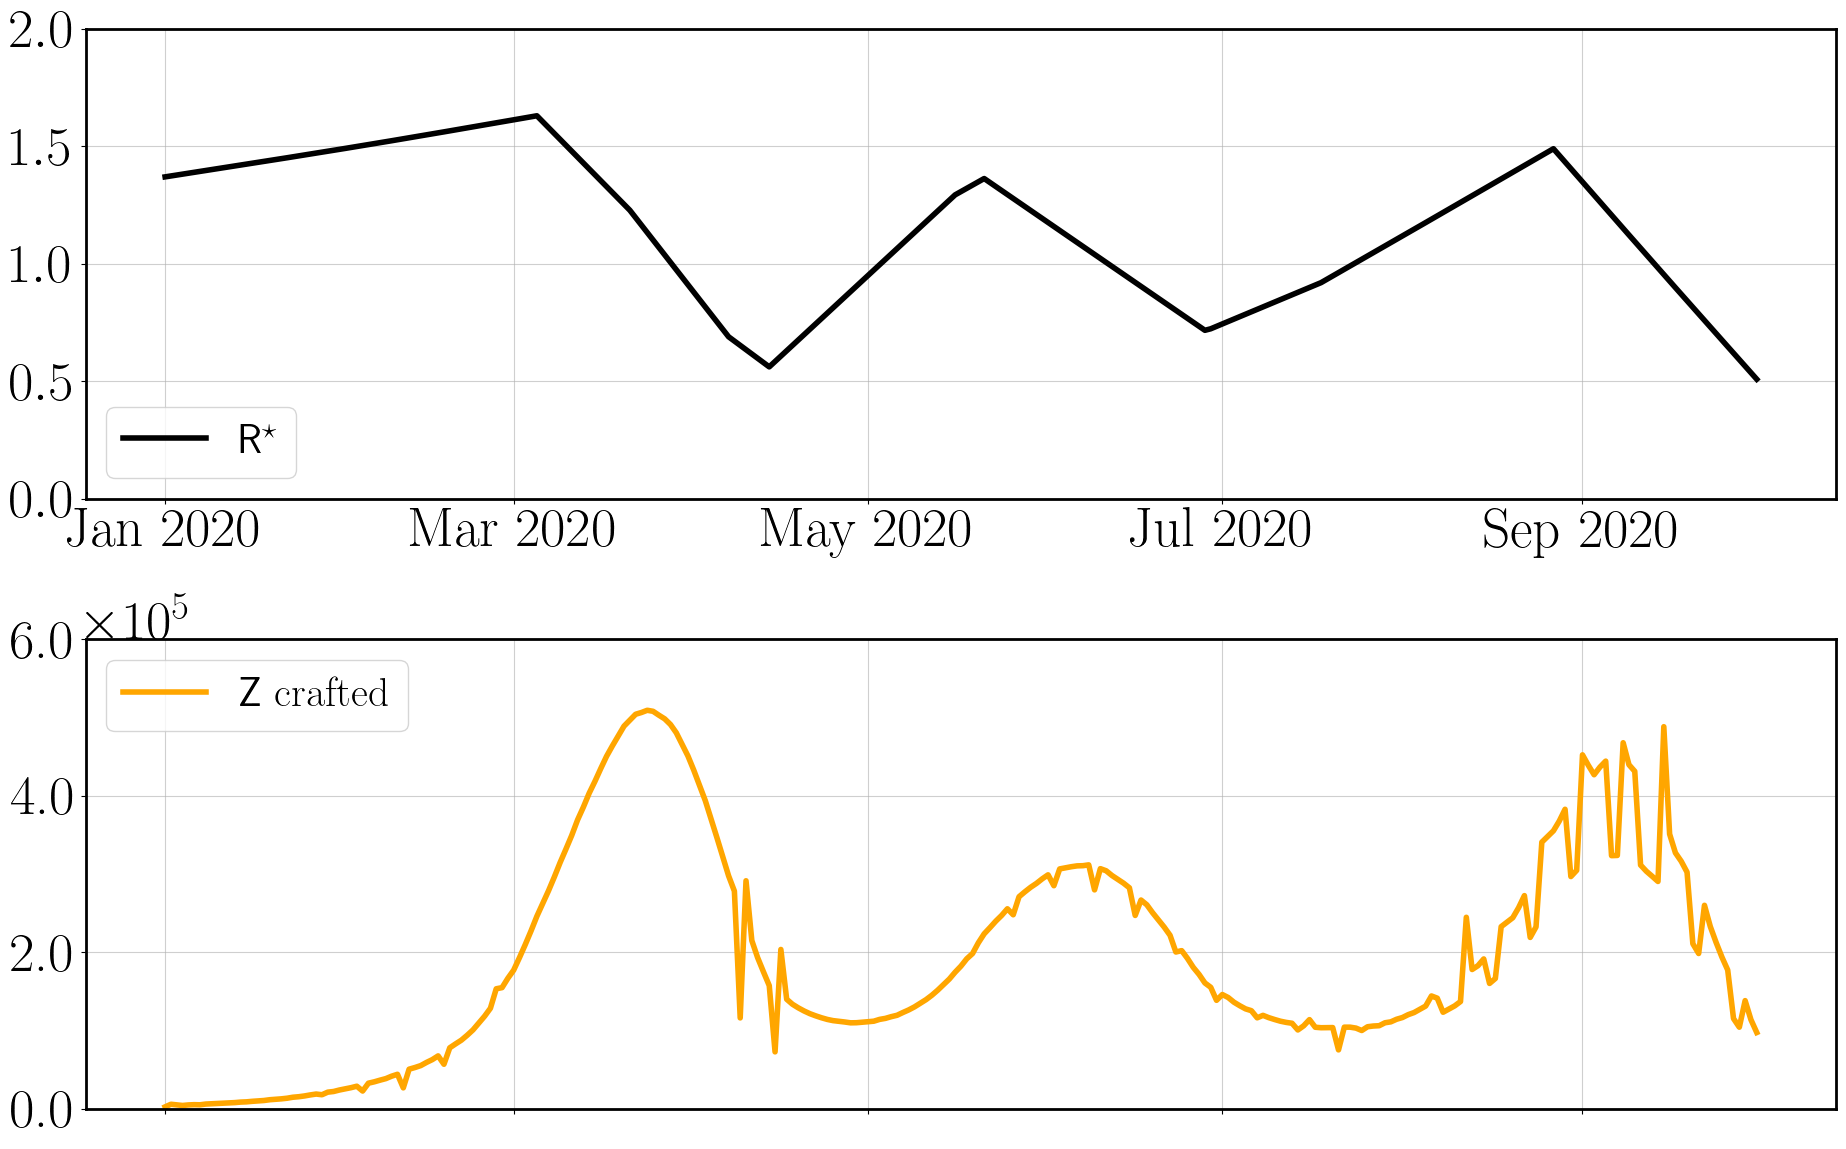

In [7]:
# Choice of number of first cases on day one
firstCases1D = 2000

# Build synthetic data based on RDagger, ODagger and chosen firstCases
ZDataBuilt, options = build.buildData_anyRO(RDagger, ODagger, firstCases1D)

# Display data built
fig, axes, formattedDatesBuilt = display_figures.display_dataBuilt(ZDataBuilt, RDagger, ODagger, options=options)

## Multivariate synthetic infection counts

### Load synthetic reproduction number $\boldsymbol{\mathsf{R}}^\dagger$
Here is the list of the configurations available in data/Synthetic/Multivariate, giving ground truth for R and O for each.
    - `connectStruct = 'Line'` connectivity structure
    - `connectStruct = 'Hub'` connectivity structure
each containing configurations associated to various inter-county correlated ground truth $\boldsymbol{\mathsf{R}}^\star$.

c:\Users\adminuser\Documents\GitHub\Covid-R-estim\display\display_figures_by_county.py:33: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


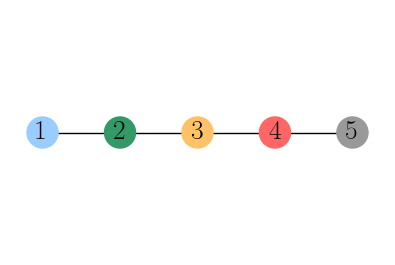

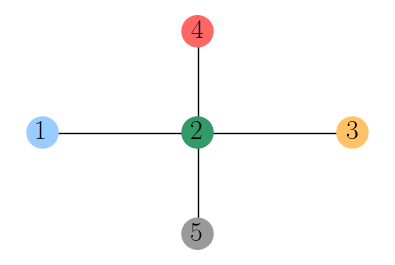

In [8]:
display_connect_structure('Line')
display_connect_structure('Hub')

In [9]:
# Choice of connectivity structure and spatial correlation level (configMulti) for multivariate synthetic infection counts
connectStruct = 'Hub'

### Ground truth multivariate reproduction number $\boldsymbol{\mathsf{R}}^\star$ with inter-county correlations
Given $\boldsymbol{\mathsf{R}}^\dagger$ found in `Config_delta_0'`&ensp; they are computed via a Tikhonov regularization as:

$$\boldsymbol{\mathsf{R}}^\star (\boldsymbol{\mathsf{R}}^\dagger; \delta) = \underset{\boldsymbol{\mathsf{R}} \in \mathbb{R}^{C\times T}}{\mathrm{argmin}} \, \lVert \boldsymbol{\mathsf{R}}^\dagger - \boldsymbol{\mathsf{R}}\rVert_2^2 +  \delta  \lVert \mathsf{G} \boldsymbol{\mathsf{R}}\rVert_2^2$$

and storaged in `Config_delta_I'`&ensp; `Config_delta_II'`&ensp; `Config_delta_III'`&ensp; `Config_delta_IV'`&ensp; respectively corresponding to $\delta_{\mathtt{I}}$, $\delta_{\mathtt{II}}$, $\delta_{\mathtt{III}}$, $\delta_{\mathtt{IV}}$ defined in the associated article. Each of their value can be found in their associated `.mat` file, using the key `deltaValue`.

c:\Users\adminuser\Documents\GitHub\Covid-R-estim\display\display_figures_by_county.py:101: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


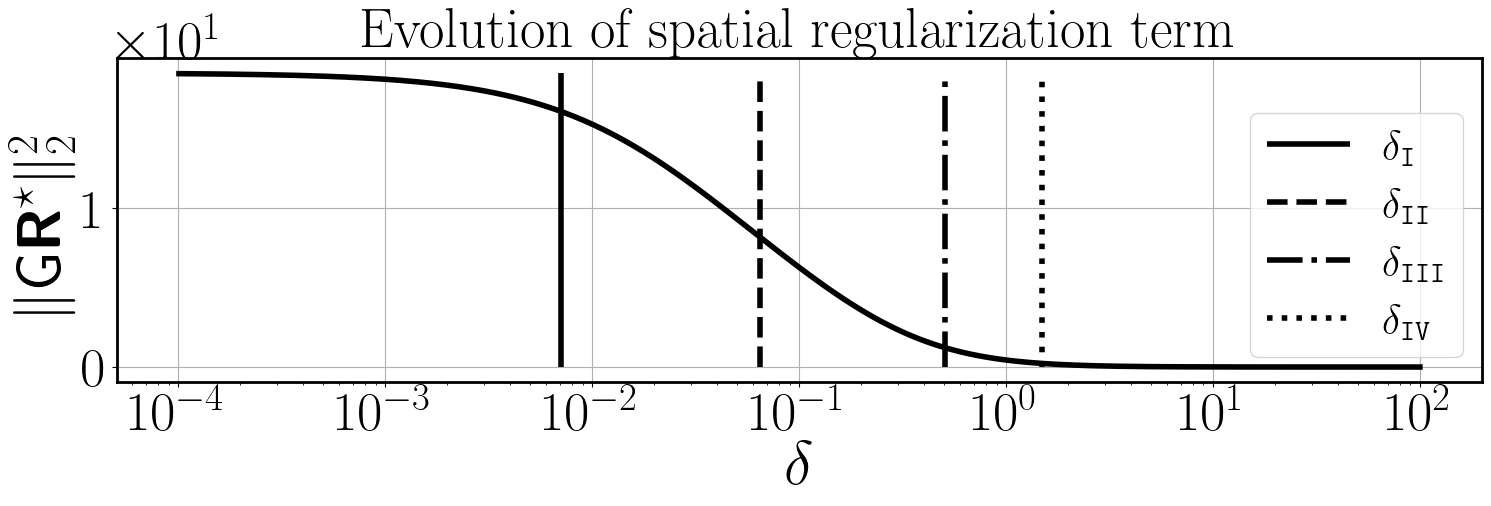

In [10]:
# Adding inter-county correlations to initial realistic univariate R crafted on each county.
R_by_county, O_by_county, optionsMulti = load.loadROconfigMulti(connectStruct, '0')

# Inter-county correlation levels computation
display_spatCorrLevels(R_by_county, options=optionsMulti, fileSuffix=connectStruct)

Computing diffusion with deltaS = 0.00 ----
Computing diffusion with deltaS = 0.01 ----
Computing diffusion with deltaS = 0.06 ----
Computing diffusion with deltaS = 0.51 ----
Computing diffusion with deltaS = 1.49 ----


c:\Users\adminuser\Documents\GitHub\Covid-R-estim\display\display_figures_by_county.py:154: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


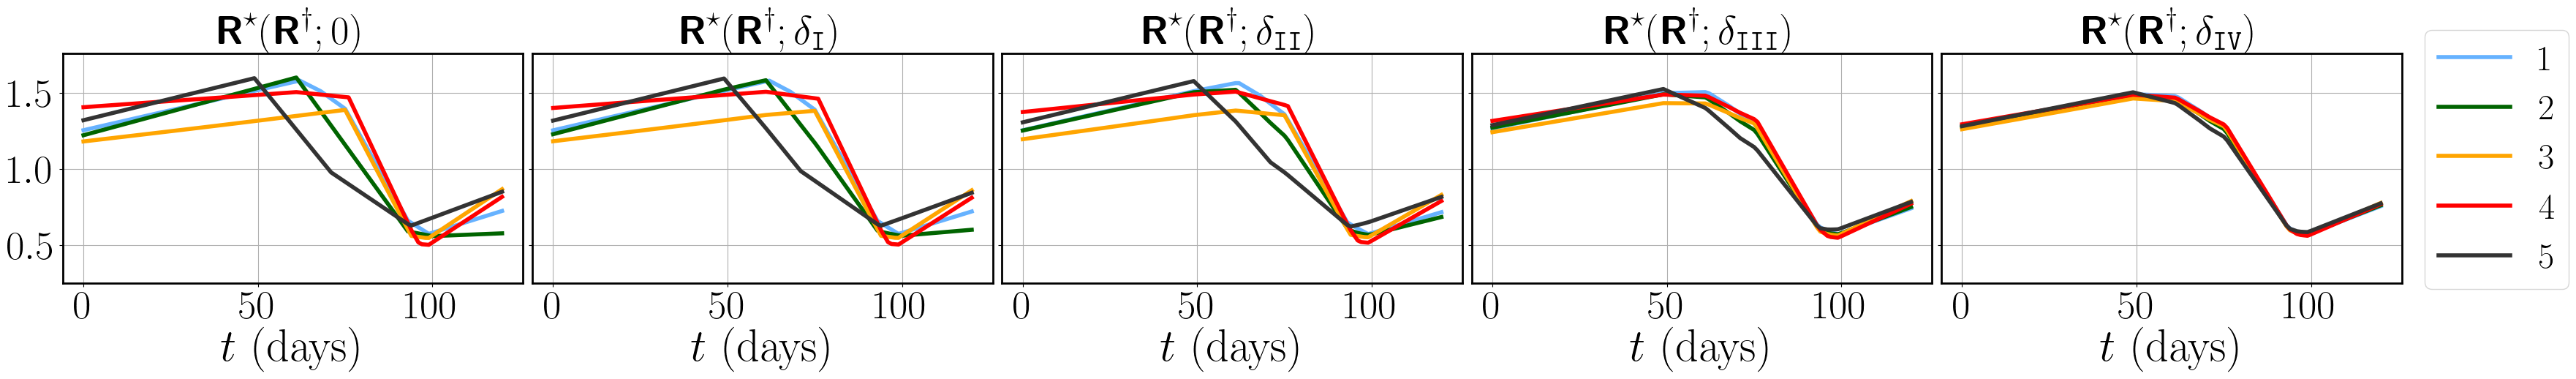

In [11]:
# Visualization of inter-county correlation levels
optionsDelta = compute_spatCorrLevels(R_by_county, options=optionsMulti, fileSuffix=connectStruct)

display_spatCorr_onR(R_by_county, optionsDelta);

In [12]:
# Adding inter-county correlations to R_by_county (or R dagger)
configMulti = 'I'
R_spat_corr = Tikhonov_spat_corr_config(R_by_county, configMulti, optionsDelta)

# Crafting synthetic infection counts using R_spat_corr (or R star)
ZDataBuilt, optionsBuilt = build.buildDataMulti_anyRO(R_spat_corr, O_by_county, options=optionsMulti)

c:\Users\adminuser\Documents\GitHub\Covid-R-estim\display\display_figures.py:370: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


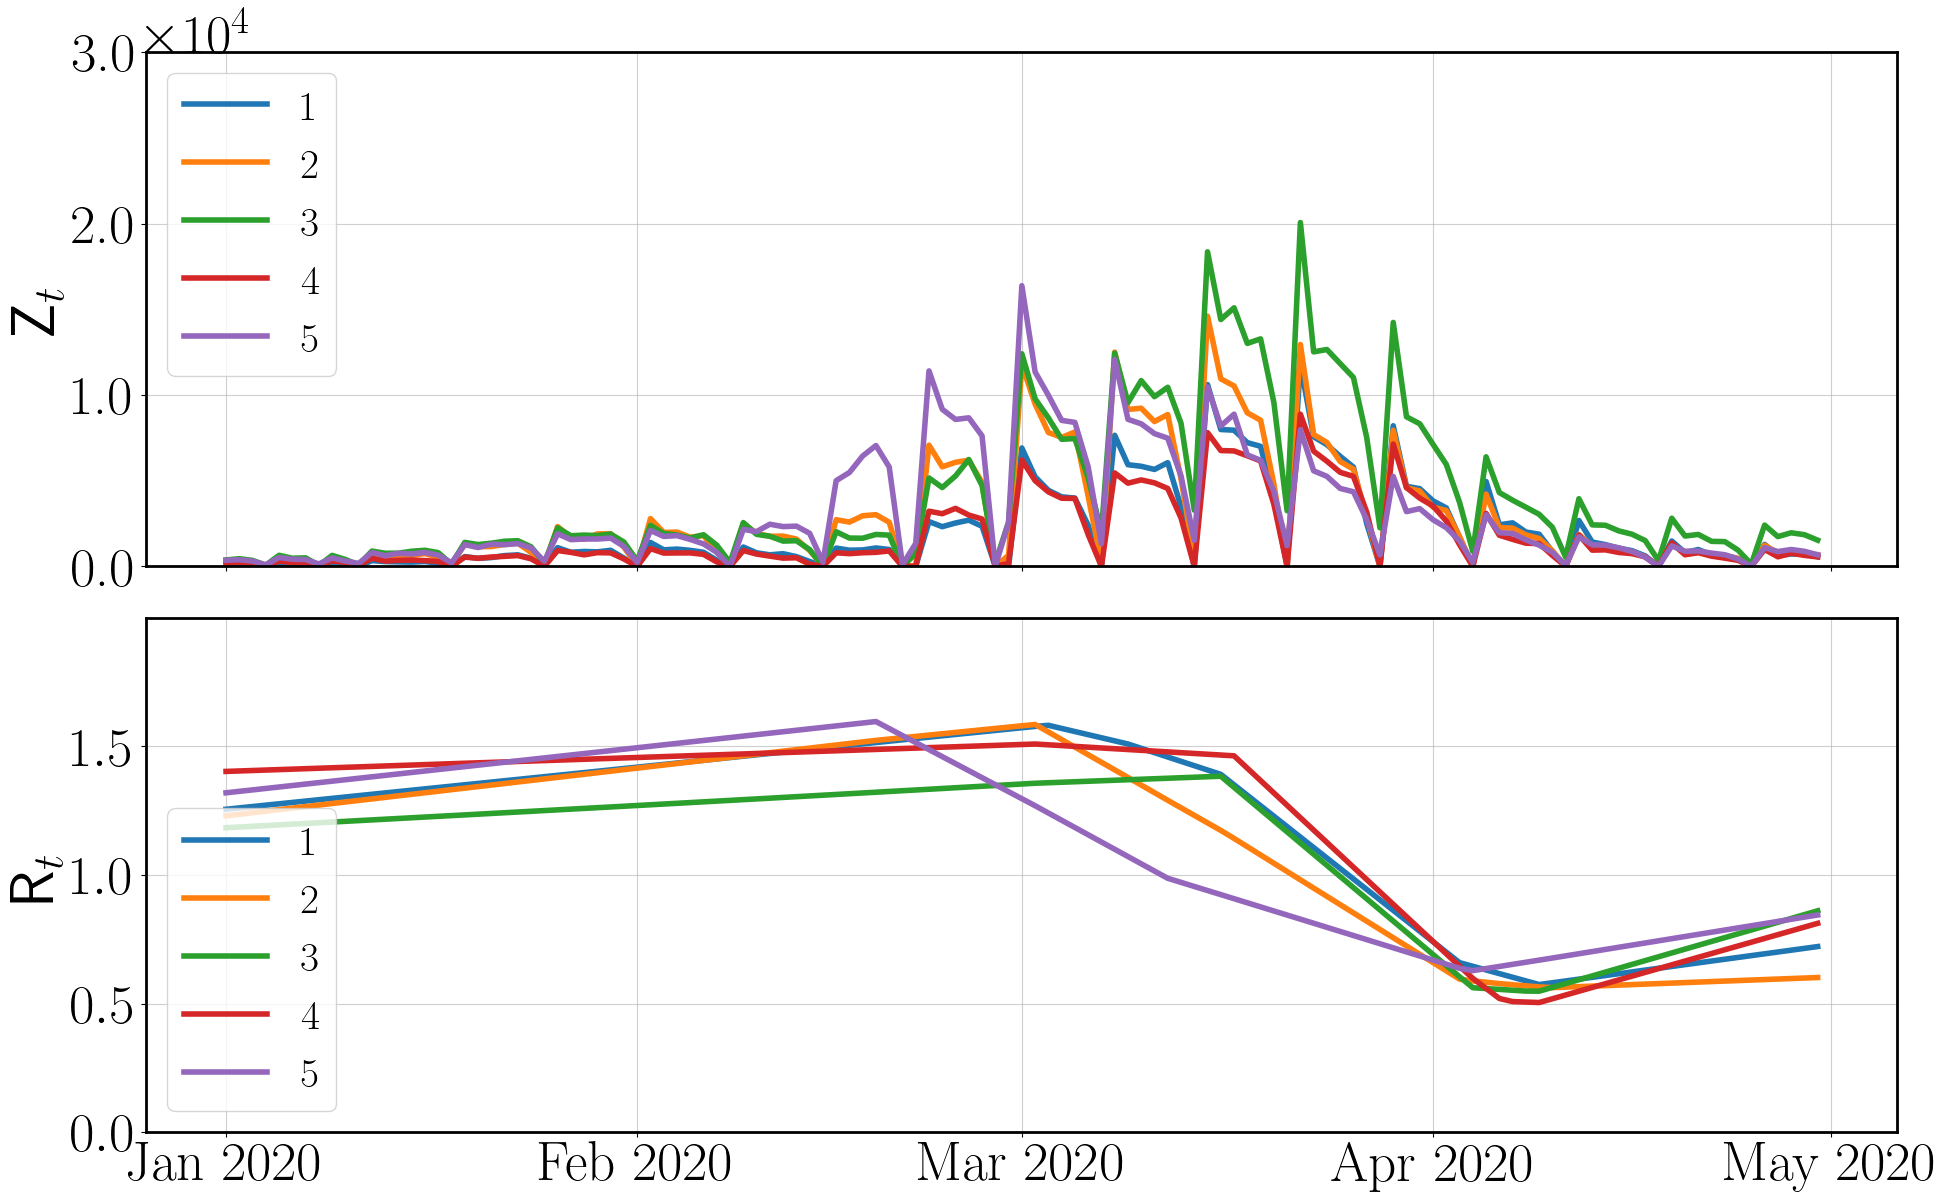

In [13]:
# Display synthetic infection counts crafted with previous configuration --------------
fig2D, axes2D, datesBuiltCrop = display_figures.display_REstim_by_county(ZDataBuilt, R_spat_corr, optionsBuilt, dataDisp=True)